# PX912: Solid Mechanics
## Workshop 3

These workshops are not marked, but they should help you to better understand theoretical aspects presented in the lectures, which should help you prepare for the PX912 viva, and practice solutions with Python coding. The latter will also be used in your coursework project. 

### Please run the cell below!
This cell loads the core library written for this module. The core library contains hints, solution checking and grading. 

Make sure that the output of the previous cell is $\texttt{Library Loaded!}$. 

In [1]:
import sys, os
sys.path.insert(0, os.getcwd()+'grader')
from grader import workshop3 as ws3
from grader import practice

grader = ws3.Workshop3()

Grader Library Loaded!


This week we move on to finite element modelling in earnest. There are two questions; the first is about visualising shape functions (an important part of the FE modeller's toolkit), and the second is our first foray into finite element modelling in the form of a 1D problem.

As before, let's first import the modules we need:

In [2]:
# SymPy Library: Symbolic Python
import sympy as sym

# Tell sympy to print things nicely
sym.init_printing()

# Matplotlib for plotting
import matplotlib.pyplot as plt

# Numpy for numerics
import numpy as np

## Question 1
We consider a three node quadratic element in the (local) coordinate system $-1 \leq \xi \leq 1$, as shown below:

<img src="./grader/pictures/problem1.png" alt="Drawing" style="width: 400px;"/>

### a)
Find the shape functions. Similar to the ones in the lecture notes, the shape functions are quadratics, and they are constrained by the fact that they must be equal to one at one node and equal to zero at the others. However an extra degree needs to be added for the third node.

In [3]:
x = sym.symbols('x')

# Store the functions
y1 = ...
y2 = ...
y3 = ...

In [3]:
# HINT AND SOLUTION
grader.hint1a()
#grader.check1a(y1, y2, y3)

Take y = A*x*x + B*x + C and apply these constraints to get the values of A, B, and C.
It helps to work this out by hand first!


### b)
Plot them using Sympy sym.plotting.plot() (https://docs.sympy.org/latest/modules/plotting.html#sympy.plotting.plot.plot)

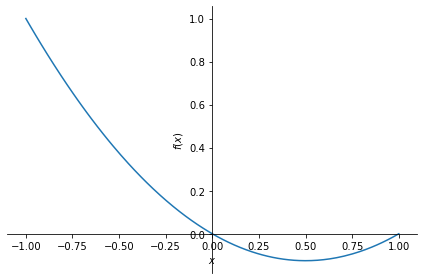

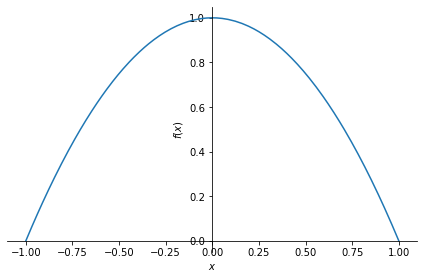

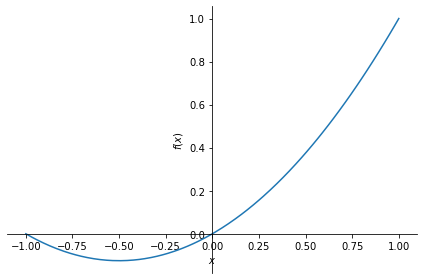

In [5]:
p1 = ...
p2 = ...
p3 = ...

In [6]:
# HINT
grader.hint1b()

The correct format for the plotting is: plot1 = sym.plotting.plot(y_i, (x,min,max)


### c)
Evaluate the elemental stiffness matrix. You can do integration using the SymPy sym.integrate() function (https://docs.sympy.org/latest/modules/integrals/integrals.html#sympy.integrals.integrals.integrate)

In [7]:
# Vector of shape functions:
N = sym.Matrix([y1, y2, y3]).T

# dN/dx
B = ...

# Define the new symbols
A, E, L = sym.symbols('A E L')

# Setup the integrand
integrand = ...

# Evaluate stiffness matrix
k = ...

k

⎡                       3            2                                        
⎢0.333333333333333⋅A⋅E⋅L  - 0.5⋅A⋅E⋅L  + 0.25⋅A⋅E⋅L  - 0.666666666666667⋅A⋅E⋅L
⎢                                                                             
⎢                                                                          3  
⎢                              3            2                       4⋅A⋅E⋅L   
⎢     - 0.666666666666667⋅A⋅E⋅L  + 0.5⋅A⋅E⋅L                        ────────  
⎢                                                                      3      
⎢                                                                             
⎢                             3                                               
⎣      0.333333333333333⋅A⋅E⋅L  - 0.25⋅A⋅E⋅L         - 0.666666666666667⋅A⋅E⋅L

3            2                               3                    ⎤
  + 0.5⋅A⋅E⋅L         0.333333333333333⋅A⋅E⋅L  - 0.25⋅A⋅E⋅L       ⎥
                                                                  ⎥
     

In [5]:
# HINT AND SOLUTION
grader.hint1c()
#grader.check1c(k)

The correct format for the integration is: sym.integrate(integrand, (x, 0, L)).


## Question 2

### All solutions to this question should be in the form of `numpy` arrays.

We consider a three-bar system between two walls with an applied force of 10N in the centre, as illustrated. Our task is to evaluate displacements and reactionary forces at the various nodes.

<img src="./grader/pictures/problem2.png" alt="Drawing" style="width: 500px;"/>

**Note:** It's not too important exactly which order you do parts (a)-(e) for this question, as long as you solve for the displacement and reaction forces correctly in the end!

### a)
Assemble the global stiffness matrix by direct assembly. This can be done using np.ix_ (https://numpy.org/doc/stable/reference/generated/numpy.ix_.html)

In [78]:
def assemble_global_stiffness(element_matrices, global_indices):
   
    # Global stiffness matrix
    K_global = np.zeros((3,3))
    
    for i, matrix in enumerate(element_matrices):
        # YOUR CODE HERE 
        
    return K_global

Form the reduced system of equations using the given boundary conditions.

Solve the system of equations using definitions of elemental stiffness
$$
k^{(e)} = \frac{E^{(e)} A^{(e)}}{L^{(e)}}
$$
where the relevant values of the Young modulus, $E^{(e)}$, cross sectional area, $A^{(e)}$, and bar length, $L^{(e)}$ are as follows:
* Bar 1: $E^{(e)} = 1.0 \times 10^{10} \text{Pa}$,  $A^{(e)} = 1.0 \times 10^{-6} \text{m}^{-2}$, $L^{(e)} = 0.1 \text{m}$
* Bar 2: $E^{(e)} = 1.0 \times 10^{10} \text{Pa}$,  $A^{(e)} = 1.0 \times 10^{-6} \text{m}^{-2}$, $L^{(e)} = 0.1 \text{m}$
* Bar 3: $E^{(e)} = 5.0 \times 10^{9} \text{Pa}$,  $A^{(e)} = 0.5 \times 10^{-6} \text{m}^{-2}$, $L^{(e)} = 0.05 \text{m}$

In [79]:
# Specify stiffness constants
k_1 = ...
k_2 = ...
k_3 = ...

# K_1 elemental matrix
K_1 = ...

# K_1 global indices (using python indexing)
nodes_1 = ...

#K_2 elemental matrix
K_2 = ...

#K_2 global indices
nodes_2 = ...

#K_3 elemental matrix
K_3 = ...

#K_3 global indices
nodes_3 = ...

# List of element matrices and indices
matrices = ..
indices = ...

K_global = assemble_global_stiffness(matrices, indices)

# Display it
print(K_global)

[[ 200000.       0. -200000.]
 [      0.   50000.  -50000.]
 [-200000.  -50000.  250000.]]


In [80]:
# HINT AND SOLUTION
# grader.hint1c()
grader.check2a(K_global)

 Correct!


### b)
Evaluate the displacement of node 3.

In [88]:
F = 
K_F =

# Evaluate displacement using the reduced system of equations
d_3 =

print(d_3)

4e-05


In [89]:
# HINT AND SOLUTION
# grader.hint2b()
grader.check2b(d_3)

 Correct!


### c)
Evaluate the reaction forces at nodes 1 and 2.

In [95]:
K_EF =

# Take the product of the above and d3
R_F =

print(R_F)

[-8. -2.]


In [96]:
# HINT AND SOLUTION
# grader.hint2c()
grader.check2c(R_F)

 Correct!


In [101]:
d_3

### d)
Calculate elemental strains/stresses. Remember that you are considering every element individually, thus each element only has 2 nodes.

In [143]:
# 2 Node shape functions

# Derivatives of shape functions
dN_1dx = ...
dN_2dx = ...
dN_3dx = ...


# elemental strains given by B_i*d_i
eps_1 = ...
eps_2 = ...
eps_3 = ...

print('Strains are: ', eps_1, eps_2, eps_3)

# elemental stresses given by E*eps_i
sigma_1 = ...
sigma_2 = ...
sigma_3 = ...

print('Stresses are: ', sigma_1, sigma_2, sigma_3)

Strains are:  0.0004 0.0004 -0.0008
Stresses are:  4000000.0 4000000.0 -4000000.0


In [146]:
# HINT AND SOLUTION
# grader.hint2d()
grader.check2d(eps_1,
               eps_2,
               eps_3,
               sigma_1,
               sigma_2,
               sigma_3)

 Correct!


## Results

Run the box below to check your progress.

In [147]:
grader.results()

Your score for this assignment: 6/6
Excellent work!
